In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('installments_payments.csv')
df_train.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [4]:
df_train.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

## Drop all the features that you think are not relevant for the project

You can drop columns from the Liya's file.

In [5]:
# df_train = df_train.drop(columns= [
#         'NAME_EDUCATION_TYPE', 
#         'NAME_FAMILY_STATUS', 
#         'NAME_HOUSING_TYPE',
#         'DAYS_BIRTH',
#         'OWN_CAR_AGE',
#         'FLAG_EMP_PHONE',
#         'FLAG_WORK_PHONE',
#         'FLAG_CONT_MOBILE',
#         'FLAG_PHONE',
#         'FLAG_EMAIL',
#         'CNT_FAM_MEMBERS',
#         'REGION_RATING_CLIENT',
#         'WEEKDAY_APPR_PROCESS_START',
#         'HOUR_APPR_PROCESS_START',
#         'APARTMENTS_AVG',
#         'BASEMENTAREA_AVG',
#         'YEARS_BEGINEXPLUATATION_AVG',
#         'YEARS_BUILD_AVG',
#         'COMMONAREA_AVG',
#         'ELEVATORS_AVG',
#         'ENTRANCES_AVG',
#         'FLOORSMAX_AVG',
#         'FLOORSMIN_AVG',
#         'LANDAREA_AVG',
#         'LIVINGAPARTMENTS_AVG',
#         'LIVINGAREA_AVG',
#         'NONLIVINGAPARTMENTS_AVG',
#         'NONLIVINGAREA_AVG',
#         'APARTMENTS_MODE',
#         'BASEMENTAREA_MODE',
#         'YEARS_BEGINEXPLUATATION_MODE',
#         'YEARS_BUILD_MODE',
#         'COMMONAREA_MODE',
#         'ELEVATORS_MODE',
#         'ENTRANCES_MODE',
#         'FLOORSMAX_MODE',
#         'FLOORSMIN_MODE',
#         'LANDAREA_MODE',
#         'LIVINGAPARTMENTS_MODE',
#         'LIVINGAREA_MODE',
#         'NONLIVINGAPARTMENTS_MODE',
#         'NONLIVINGAREA_MODE',
#         'APARTMENTS_MEDI',
#         'BASEMENTAREA_MEDI',
#         'YEARS_BEGINEXPLUATATION_MEDI',
#         'YEARS_BUILD_MEDI',
#         'COMMONAREA_MEDI',
#         'ELEVATORS_MEDI',
#         'ENTRANCES_MEDI',
#         'FLOORSMAX_MEDI',
#         'FLOORSMIN_MEDI',
#         'LANDAREA_MEDI',
#         'LIVINGAPARTMENTS_MEDI',
#         'LIVINGAREA_MEDI',
#         'NONLIVINGAPARTMENTS_MEDI',
#         'NONLIVINGAREA_MEDI',
#         'FONDKAPREMONT_MODE',
#         'HOUSETYPE_MODE',
#         'TOTALAREA_MODE',
#         'WALLSMATERIAL_MODE',
#         'EMERGENCYSTATE_MODE',
#         'DAYS_LAST_PHONE_CHANGE',
#         'FLAG_DOCUMENT_2',
#         'FLAG_DOCUMENT_3',
#         'FLAG_DOCUMENT_4',
#         'FLAG_DOCUMENT_5',
#         'FLAG_DOCUMENT_6',
#         'FLAG_DOCUMENT_7',
#         'FLAG_DOCUMENT_8',
#         'FLAG_DOCUMENT_9',
#         'FLAG_DOCUMENT_10',
#         'FLAG_DOCUMENT_11',
#         'FLAG_DOCUMENT_12',
#         'FLAG_DOCUMENT_13',
#         'FLAG_DOCUMENT_14',
#         'FLAG_DOCUMENT_15',
#         'FLAG_DOCUMENT_16',
#         'FLAG_DOCUMENT_17',
#         'FLAG_DOCUMENT_18',
#         'FLAG_DOCUMENT_19',
#         'FLAG_DOCUMENT_20',
#         'FLAG_DOCUMENT_21'
#         ], axis = 1)

In [6]:
# df_train.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', ], axis = 1, inplace = True)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


## Let's work on the categorical features

The categorical features are the one with the type 'object' in the above cell. The goal of this part is to check how many distinct values has each of these categorical features. Don't forget that these variables will be transformed into dummy variables at the end, in order to run the machine learning model. As a reminder, if we have $\textit{n}$ distinct values in a categorical variable, we will get $\textit{n}-1$ new columns with the dummy method. Having so many features is bad for the model since it will increase the overfitting. 

Thus if we have many distinct values for a particular categorical variable, we should drop this feature.

Let's create a list of all categorical features:

In [8]:
[col for col in df_train.columns if df_train[col].dtype == object]

[]

In [9]:
L = [col for col in df_train.columns if df_train[col].dtype == object]

Let's see how many distinct values they have.

In [10]:
for col in L:
    print(col, 'has ',df_train[col].nunique(), ' distinct values.')

It seems that the last two variables have many different values. One approach would be to find relationships between their values in order to gather them and reduce the dimension of distinct values. 
Here, we will just drop them to simplify the work.

In [11]:
# df_train.drop(['OCCUPATION_TYPE', 'ORGANIZATION_TYPE'], axis = 1, inplace = True )

## Correlation between variables

The dependant variable ('Target') should be highly correlated to the independant variables (inputs) but the independant variables should not be correlated with each other. This can cause mutlicollinearity and will have a negative impact on future models.

Let's check the correlation matrix.

<AxesSubplot:>

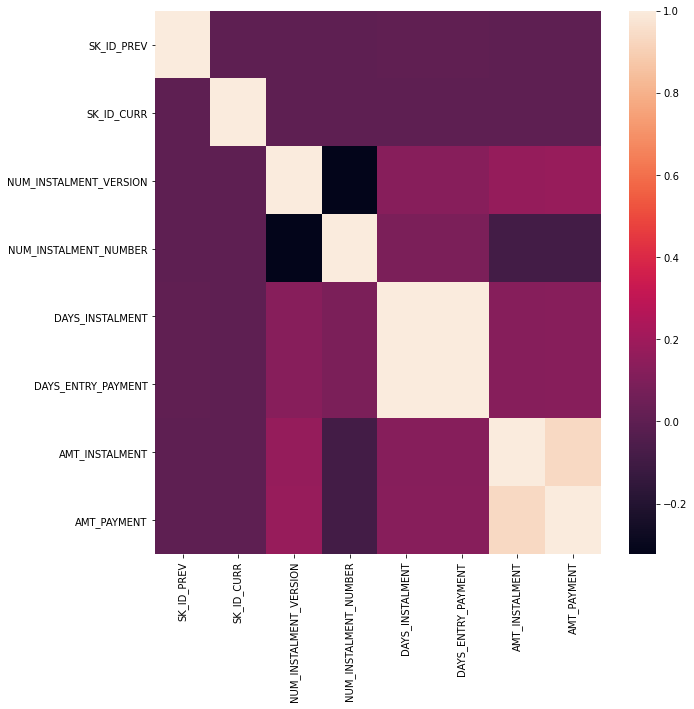

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr())

Flag_mobil seems really correlated with different other features. Let's remove it.

<AxesSubplot:>

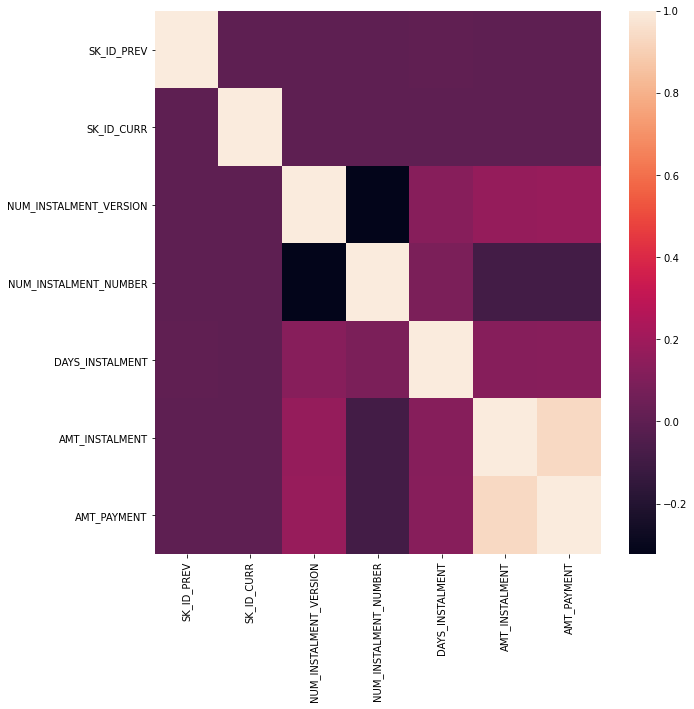

In [13]:
df_train.drop('DAYS_ENTRY_PAYMENT', axis = 1, inplace = True)
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr())

It worked well! 
However, we still have some variables correlated with each other. 
AMT_CREDIT, AMT_ANNUITY and AMT_GOODS_PRICE seem have a relationship together, as well as DEF_60_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE.

Let's see their respective correlations:

<AxesSubplot:>

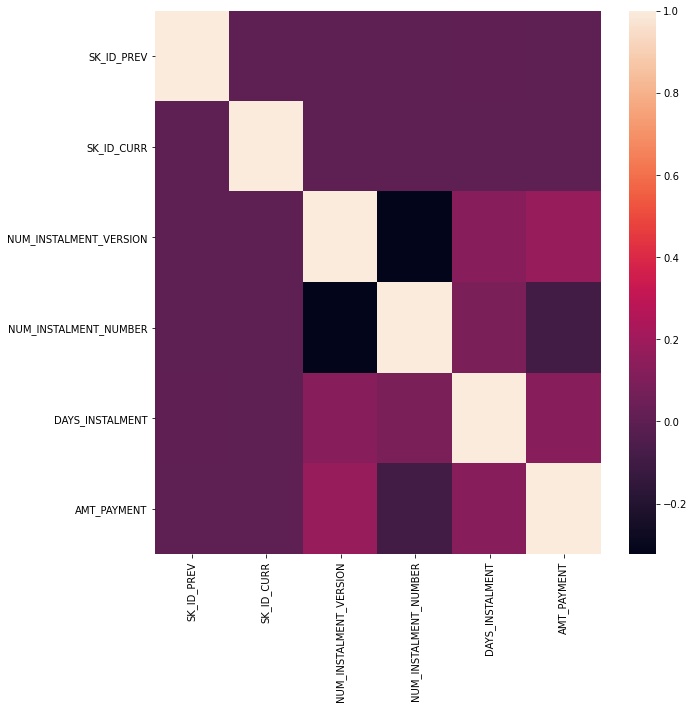

In [14]:
# plt.figure(figsize = (5,5))
# plt.subplot(3,1,1)

# sns.heatmap(df_train[['DEF_60_CNT_SOCIAL_CIRCLE',
#           'OBS_60_CNT_SOCIAL_CIRCLE',
#           'DEF_30_CNT_SOCIAL_CIRCLE',
#           'OBS_30_CNT_SOCIAL_CIRCLE']].corr(), annot=True)

# plt.subplot(3,1,3)

# sns.heatmap(df_train[['AMT_CREDIT', 'AMT_ANNUITY',
#                       'AMT_GOODS_PRICE']].corr(), annot=True)
df_train.drop('AMT_INSTALMENT', axis = 1, inplace = True)
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr())

DEF_30_CNT_SOCIAL_CIRCLE and AMT_CREDIT seem the most correlated with the others so let's remove it. 

In [15]:
# df_train.drop(['DEF_30_CNT_SOCIAL_CIRCLE','AMT_CREDIT'], axis = 1, inplace = True)

Let's check now:

In [16]:
# plt.figure(figsize = (5,5))
# plt.subplot(3,1,1)

# sns.heatmap(df_train[['DEF_60_CNT_SOCIAL_CIRCLE',
#           'OBS_60_CNT_SOCIAL_CIRCLE',
#           'OBS_30_CNT_SOCIAL_CIRCLE']].corr(), annot=True)

# plt.subplot(3,1,3)

# sns.heatmap(df_train[['AMT_ANNUITY',
#                       'AMT_GOODS_PRICE']].corr(), annot=True)

AMT_ANNUITY and AMT_GOODS_PRICE seem still correlated so we will drop one of them.

In [17]:
# df_train.drop(['AMT_ANNUITY'], axis = 1, inplace = True)

There is still correlation between the following variables: 

In [18]:
# sns.heatmap(df_train[['REG_REGION_NOT_LIVE_REGION',
#           'REG_REGION_NOT_WORK_REGION',
#           'LIVE_REGION_NOT_WORK_REGION',
#           'REG_CITY_NOT_LIVE_CITY',
#           'REG_CITY_NOT_WORK_CITY',
#           'LIVE_CITY_NOT_WORK_CITY']].corr(), annot=True)

So we can remove REG_REGION_NOT_WORK_REGION and REG_CITY_NOT_WORK_CITY. 

In [19]:
# df_train.drop(['REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY'], axis =1, inplace = True)

In [20]:
# sns.heatmap(df_train[['REG_REGION_NOT_LIVE_REGION',
#           'LIVE_REGION_NOT_WORK_REGION',
#           'REG_CITY_NOT_LIVE_CITY',
#           'LIVE_CITY_NOT_WORK_CITY']].corr(), annot=True)

Now we are ready to work with the remaining features! 

In [21]:
df_train.shape

(13605401, 6)

In [22]:
df_train.to_csv('install_pay.csv')